In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
from scipy.stats import pearsonr, spearmanr

In [79]:
train = pd.read_csv(r'C:\Users\samhi\OneDrive - sjsu.edu\Documents\sjsu\Fall_24\ML\GWAR\Dataset\train.csv')
test = pd.read_csv(r'C:\Users\samhi\OneDrive - sjsu.edu\Documents\sjsu\Fall_24\ML\GWAR\Dataset\test.csv')
data_dict = pd.read_csv(r'C:\Users\samhi\OneDrive - sjsu.edu\Documents\sjsu\Fall_24\ML\GWAR\Dataset\data_dictionary.csv')

In [80]:
#checking columns in train and test 
print(train.columns)
print(test.columns)

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [81]:
# Drooping the rows with empty PCIAT Score.
columns_to_check = [
    'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
    'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12',
    'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
    'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20'
]  # Add all the other PCIAT columns

# Drop rows where any of these columns have NaN values
train_cleaned = train.dropna(subset=columns_to_check)

# Now 'train_cleaned' will have rows with no empty values in the specified columns

# Print the number of rows in the cleaned DataFrame
print(f"Number of rows after dropping NaN values: {train_cleaned.shape[0]}")

Number of rows after dropping NaN values: 2671


### Understanding the columns relationship with SII and PCIAT Score 

**Reltionship of Age and Sex with PCIAT_Total and SII

Pearson Correlation between Age and PCIAT_Total: 0.4072987622600073, p-value: 2.811537915316184e-107
Spearman Correlation between Age and PCIAT_Total: 0.42879853836206894, p-value: 6.307876942540044e-120


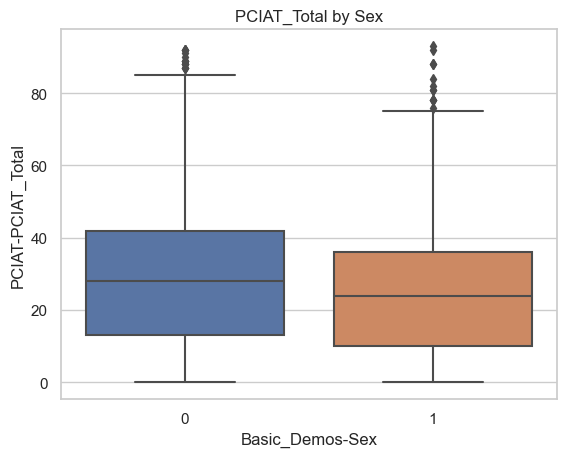

Chi-Square Test for Sex and SII: chi2=26.097365903788763, p-value=9.100036180802387e-06
Kruskal-Wallis Test for PCIAT_Total across SII categories: stat=2076.589257027863, p-value=0.0


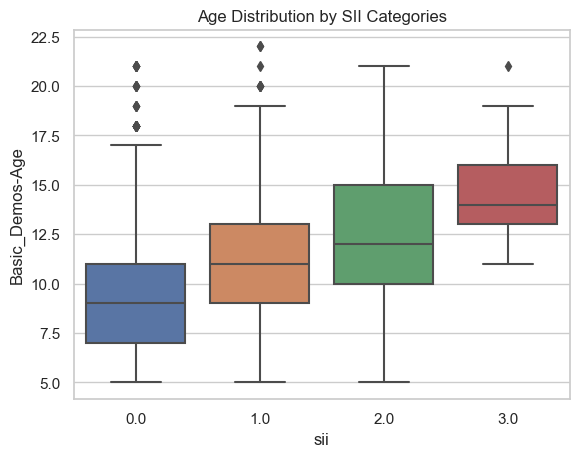

T-test for PCIAT_Total by Sex: t-stat=4.723341314140082, p-value=2.4400744974586966e-06
Mann-Whitney U test for PCIAT_Total by Sex: U-stat=913353.5, p-value=6.344472101558856e-06


In [82]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kruskal, chi2_contingency, ttest_ind, mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_cleaned is already loaded in your environment
pciat_total = train_cleaned['PCIAT-PCIAT_Total'] 
sii = train_cleaned['sii']  

# 1. Pearson Correlation (for continuous variables)
pearson_corr, p_value = pearsonr(train_cleaned['Basic_Demos-Age'], pciat_total)
print(f"Pearson Correlation between Age and PCIAT_Total: {pearson_corr}, p-value: {p_value}")

# 2. Spearman Correlation (for monotonic relationships)
spearman_corr, p_value = spearmanr(train_cleaned['Basic_Demos-Age'], pciat_total)
print(f"Spearman Correlation between Age and PCIAT_Total: {spearman_corr}, p-value: {p_value}")

# Box Plot: PCIAT_Total by Sex
sns.boxplot(x='Basic_Demos-Sex', y=pciat_total, data=train_cleaned)
plt.title('PCIAT_Total by Sex')
plt.show()

# Chi-Square Test for SII by Sex (if SII is a categorical variable)
contingency_table = pd.crosstab(train_cleaned['Basic_Demos-Sex'], sii)
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test for Sex and SII: chi2={chi2}, p-value={p_value}")

# Kruskal-Wallis Test: PCIAT_Total across SII categories
sii_groups = [train_cleaned['PCIAT-PCIAT_Total'][train_cleaned['sii'] == category] for category in train_cleaned['sii'].unique()]
kruskal_stat, p_value = kruskal(*sii_groups)
print(f"Kruskal-Wallis Test for PCIAT_Total across SII categories: stat={kruskal_stat}, p-value={p_value}")

# Visualization: Age Distribution by SII Categories
sns.boxplot(x='sii', y='Basic_Demos-Age', data=train_cleaned)
plt.title('Age Distribution by SII Categories')
plt.show()

# Additional Tests: T-test or Mann-Whitney U for PCIAT_Total by Sex
sex_groups = train_cleaned['Basic_Demos-Sex'].unique()
group1 = pciat_total[train_cleaned['Basic_Demos-Sex'] == sex_groups[0]]
group2 = pciat_total[train_cleaned['Basic_Demos-Sex'] == sex_groups[1]]

# T-test
t_stat, p_value = ttest_ind(group1, group2)
print(f"T-test for PCIAT_Total by Sex: t-stat={t_stat}, p-value={p_value}")

# Mann-Whitney U test (non-parametric)
u_stat, p_value = mannwhitneyu(group1, group2)
print(f"Mann-Whitney U test for PCIAT_Total by Sex: U-stat={u_stat}, p-value={p_value}")


Pearson Correlation between Age and SII: 0.3629922019585955, p-value: 5.499637177470324e-84
Spearman Correlation between Age and SII: 0.3752981872175275, p-value: 4.25885303912216e-90


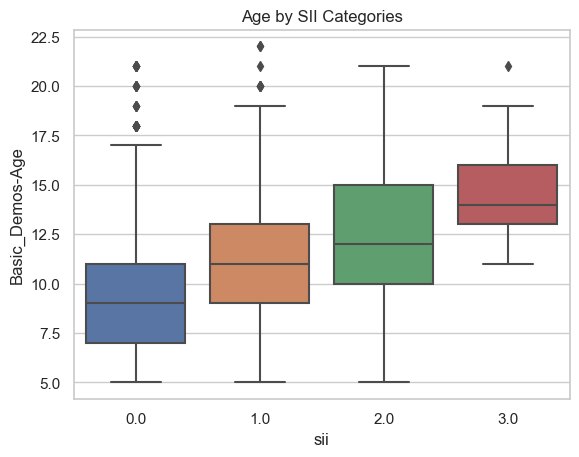

Kruskal-Wallis Test for Age across SII categories: stat=384.9027353790209, p-value=4.122612313250916e-83


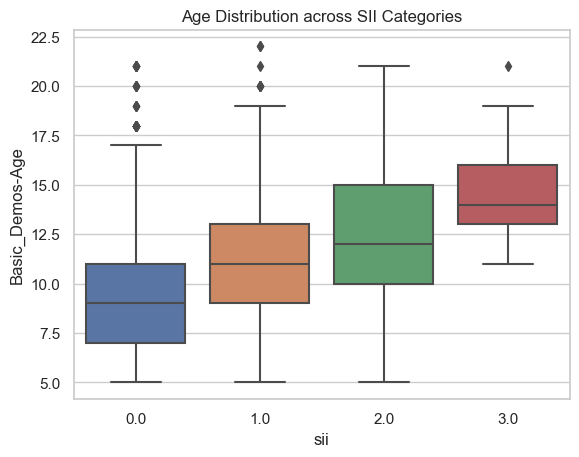

In [83]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kruskal, chi2_contingency, ttest_ind, mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_cleaned is already loaded in your environment
pciat_total = train_cleaned['PCIAT-PCIAT_Total'] 
sii = train_cleaned['sii']

# Analysis for Age and SII
age = train_cleaned['Basic_Demos-Age']

# 1. Pearson Correlation (for continuous variables)
pearson_corr_age_sii, p_value_age_sii = pearsonr(age, sii)
print(f"Pearson Correlation between Age and SII: {pearson_corr_age_sii}, p-value: {p_value_age_sii}")

# 2. Spearman Correlation (for monotonic relationships)
spearman_corr_age_sii, p_value_age_sii = spearmanr(age, sii)
print(f"Spearman Correlation between Age and SII: {spearman_corr_age_sii}, p-value: {p_value_age_sii}")

# Box Plot: SII by Age
sns.boxplot(x='sii', y=age, data=train_cleaned)
plt.title('Age by SII Categories')
plt.show()

# Kruskal-Wallis Test: Age across SII categories
sii_age_groups = [age[train_cleaned['sii'] == category] for category in train_cleaned['sii'].unique()]
kruskal_stat_age, p_value_age = kruskal(*sii_age_groups)
print(f"Kruskal-Wallis Test for Age across SII categories: stat={kruskal_stat_age}, p-value={p_value_age}")

# Additional Visualization: Age Distribution
sns.boxplot(x='sii', y='Basic_Demos-Age', data=train_cleaned)
plt.title('Age Distribution across SII Categories')
plt.show()


Age is positively correlated with SII: Both Pearson and Spearman correlations show a moderate positive relationship.
Statistical significance: The correlations and the Kruskal-Wallis test all show very small p-values, showcasing statistical significance.
The Kruskal-Wallis test further suggests that Age varies significantly across different SII categories, meaning that Age is a factor influencing the severity of problematic internet use.

**CGAS SCORE with PCIAT_Total & SII

In [84]:
null1 = train_cleaned['CGAS-Season'].isnull().sum()
null2 = train_cleaned['CGAS-CGAS_Score'].isnull().sum()
print('Null values in CGAS-Season', null1)
print('Null values in CGAS-CGAS_Score', null2)

Null values in CGAS-Season 383
Null values in CGAS-CGAS_Score 383


In [85]:
# Drop rows with null values in the 'CGAS-Season' column and update the DataFrame
train_cleaned1 = train_cleaned.dropna(subset=['CGAS-Season'])

# Check if the rows with null values have been removed
null_values_cgas_season = train_cleaned1['CGAS-Season'].isnull().sum()
print("Null values in 'CGAS-Season' column after dropping:", null_values_cgas_season)


Null values in 'CGAS-Season' column after dropping: 0


In [86]:
from scipy.stats import pointbiserialr, f_oneway, kruskal, pearsonr, spearmanr


# Extract the necessary columns
sii = train_cleaned1['sii']
cgas_season = train_cleaned1['CGAS-Season']
cgas_score = train_cleaned1['CGAS-CGAS_Score']
pciat_total = train_cleaned1['PCIAT-PCIAT_Total']

# Chi-Square Test for independence between 'SII' and 'CGAS-Season' (both categorical)
contingency_table = pd.crosstab(sii, cgas_season)
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# ANOVA for CGAS-CGAS_Score vs SII
anova_score = f_oneway(cgas_score[sii == 0], cgas_score[sii == 1], cgas_score[sii == 2], cgas_score[sii == 3])

# Kruskal-Wallis Test for CGAS-CGAS_Score vs SII (non-parametric alternative)
kruskal_score = kruskal(cgas_score[sii == 0], cgas_score[sii == 1], cgas_score[sii == 2], cgas_score[sii == 3])


# ANOVA for PCIAT_Total vs CGAS-Season
anova_season = f_oneway(pciat_total[cgas_season == 'Fall'],
                        pciat_total[cgas_season == 'Spring'],
                        pciat_total[cgas_season == 'Winter'],
                        pciat_total[cgas_season == 'Summer'])

# Kruskal-Wallis Test for PCIAT_Total vs CGAS-Season (non-parametric alternative)
kruskal_season = kruskal(pciat_total[cgas_season == 'Fall'],
                        pciat_total[cgas_season == 'Spring'],
                        pciat_total[cgas_season == 'Winter'],
                        pciat_total[cgas_season == 'Summer'])

# Pearson Correlation for CGAS-CGAS_Score vs PCIAT_Total
pearson_score, _ = pearsonr(cgas_score, pciat_total)

# Spearman Correlation for CGAS-CGAS_Score vs PCIAT_Total
spearman_score, _ = spearmanr(cgas_score, pciat_total)

# Output the results
print("Chi-Square Test: SII vs CGAS-Season: Chi2 =", chi2, "p-value =", p_value)
print("ANOVA: PCIAT_Total vs CGAS-Season:", anova_season)
print("Kruskal-Wallis: PCIAT_Total vs CGAS-Season:", kruskal_season)

print("\nANOVA: CGAS-CGAS_Score vs SII:", anova_score)
print("Kruskal-Wallis: CGAS-CGAS_Score vs SII:", kruskal_score)
print("\nPearson Correlation (CGAS-CGAS_Score vs PCIAT_Total):", pearson_score)
print("Spearman Correlation (CGAS-CGAS_Score vs PCIAT_Total):", spearman_score)



Chi-Square Test: SII vs CGAS-Season: Chi2 = 5.907515054826947 p-value = 0.7491377355429203
ANOVA: PCIAT_Total vs CGAS-Season: F_onewayResult(statistic=0.3246624694223341, pvalue=0.8075445490975837)
Kruskal-Wallis: PCIAT_Total vs CGAS-Season: KruskalResult(statistic=0.7664059914689129, pvalue=0.8574842282174284)

ANOVA: CGAS-CGAS_Score vs SII: F_onewayResult(statistic=5.7662443748033105, pvalue=0.0006315908682533686)
Kruskal-Wallis: CGAS-CGAS_Score vs SII: KruskalResult(statistic=13.749629936913376, pvalue=0.0032665372375642737)

Pearson Correlation (CGAS-CGAS_Score vs PCIAT_Total): -0.06371025627391658
Spearman Correlation (CGAS-CGAS_Score vs PCIAT_Total): -0.0440429174420265


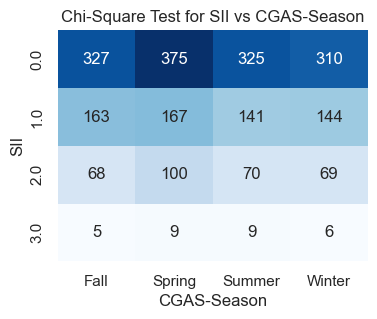

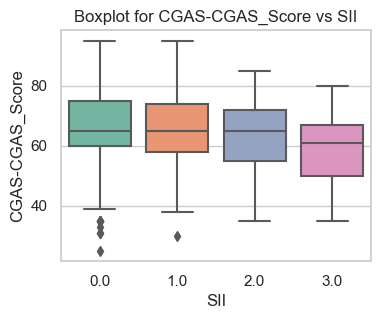

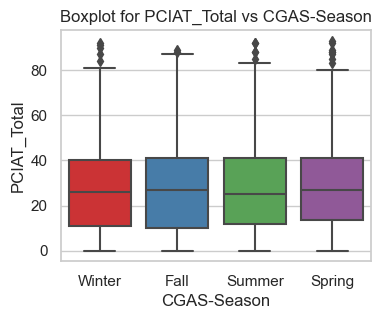

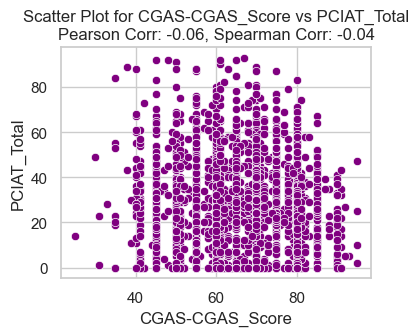

In [87]:
# Set up seaborn styles for better aesthetics
sns.set(style="whitegrid")

# Extract the necessary columns
sii = train_cleaned1['sii']
cgas_season = train_cleaned1['CGAS-Season']
cgas_score = train_cleaned1['CGAS-CGAS_Score']
pciat_total = train_cleaned1['PCIAT-PCIAT_Total']

# Chi-Square Test for independence between 'SII' and 'CGAS-Season' (both categorical)
contingency_table = pd.crosstab(sii, cgas_season)
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Plot the Chi-Square test results (contingency table)
plt.figure(figsize=(4, 3))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Chi-Square Test for SII vs CGAS-Season")
plt.xlabel("CGAS-Season")
plt.ylabel("SII")
plt.show()

# ANOVA for CGAS-CGAS_Score vs SII
anova_score = f_oneway(cgas_score[sii == 0], cgas_score[sii == 1], cgas_score[sii == 2], cgas_score[sii == 3])

# Kruskal-Wallis Test for CGAS-CGAS_Score vs SII (non-parametric alternative)
kruskal_score = kruskal(cgas_score[sii == 0], cgas_score[sii == 1], cgas_score[sii == 2], cgas_score[sii == 3])

# Plot Boxplot for CGAS-CGAS_Score vs SII
plt.figure(figsize=(4, 3))
sns.boxplot(x=sii, y=cgas_score, palette="Set2")
plt.title("Boxplot for CGAS-CGAS_Score vs SII")
plt.xlabel("SII")
plt.ylabel("CGAS-CGAS_Score")
plt.show()

# ANOVA for PCIAT_Total vs CGAS-Season
anova_season = f_oneway(pciat_total[cgas_season == 'Fall'],
                        pciat_total[cgas_season == 'Spring'],
                        pciat_total[cgas_season == 'Winter'],
                        pciat_total[cgas_season == 'Summer'])

# Kruskal-Wallis Test for PCIAT_Total vs CGAS-Season (non-parametric alternative)
kruskal_season = kruskal(pciat_total[cgas_season == 'Fall'],
                        pciat_total[cgas_season == 'Spring'],
                        pciat_total[cgas_season == 'Winter'],
                        pciat_total[cgas_season == 'Summer'])

# Plot Boxplot for PCIAT_Total vs CGAS-Season
plt.figure(figsize=(4, 3))
sns.boxplot(x=cgas_season, y=pciat_total, palette="Set1")
plt.title("Boxplot for PCIAT_Total vs CGAS-Season")
plt.xlabel("CGAS-Season")
plt.ylabel("PCIAT_Total")
plt.show()

# Pearson Correlation for CGAS-CGAS_Score vs PCIAT_Total
pearson_score, _ = pearsonr(cgas_score, pciat_total)

# Spearman Correlation for CGAS-CGAS_Score vs PCIAT_Total
spearman_score, _ = spearmanr(cgas_score, pciat_total)

# Scatter plot for Pearson and Spearman Correlations
plt.figure(figsize=(4, 3))
sns.scatterplot(x=cgas_score, y=pciat_total, color="purple")
plt.title(f"Scatter Plot for CGAS-CGAS_Score vs PCIAT_Total\nPearson Corr: {pearson_score:.2f}, Spearman Corr: {spearman_score:.2f}")
plt.xlabel("CGAS-CGAS_Score")
plt.ylabel("PCIAT_Total")
plt.show()


CGAS-Season:
•	Shows no significant association with SII.
•	Shows no significant relationship with PCIAT_Total.
•	Therefore, it does not contribute meaningfully to the analysis.
CGAS-CGAS_Score:
•	Shows a significant relationship with SII (based on both ANOVA and Kruskal-Wallis).
•	Although it has weak correlations with PCIAT_Total, the significant association with SII suggests that it is useful.

### DROPPING CGAS_SEASON

In [88]:
# Drop the 'CGAS-Season' column and update the DataFrame
train_cleaned = train_cleaned.drop(columns=['CGAS-Season'])

In [89]:
print(train_cleaned.columns)

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI', 'Physical-Height',
       'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM'

## Physical Measures with PCIAT_Total & SII

**Physical Season

In [90]:
pnull1 = train_cleaned['Physical-Season'].isnull().sum()
print('Null values in Physical-Season', pnull1)

Null values in Physical-Season 140


In [91]:
# Drop rows with null values in the 'Physical-Season' column and update the DataFrame
train_cleaned2 = train_cleaned.dropna(subset=['Physical-Season'])

# Check if the rows with null values have been removed
null_values_cgas_season = train_cleaned2['Physical-Season'].isnull().sum()
print("Null values in 'Physical-Season' column after dropping:", null_values_cgas_season)

Null values in 'Physical-Season' column after dropping: 0


In [92]:
from scipy.stats import pointbiserialr, f_oneway, kruskal, pearsonr, spearmanr


# Extract the necessary columns
sii = train_cleaned1['sii']
physical_season = train_cleaned1['Physical-Season']


# Chi-Square Test for independence between 'SII' and 'CGAS-Season' (both categorical)
contingency_table = pd.crosstab(sii, physical_season)
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# ANOVA for PCIAT_Total vs CGAS-Season
anova_season = f_oneway(pciat_total[physical_season == 'Fall'],
                        pciat_total[physical_season == 'Spring'],
                        pciat_total[physical_season == 'Winter'],
                        pciat_total[physical_season == 'Summer'])

# Kruskal-Wallis Test for PCIAT_Total vs CGAS-Season (non-parametric alternative)
kruskal_season = kruskal(pciat_total[physical_season == 'Fall'],
                        pciat_total[physical_season == 'Spring'],
                        pciat_total[physical_season== 'Winter'],
                        pciat_total[physical_season== 'Summer'])

# Output the results
print("Chi-Square Test: SII vs Physical-Season: Chi2 =", chi2, "p-value =", p_value)
print("ANOVA: PCIAT_Total vs Physical-Season:", anova_season)
print("Kruskal-Wallis: PCIAT_Total vs Physical-Season:", kruskal_season)



Chi-Square Test: SII vs Physical-Season: Chi2 = 13.584595403309724 p-value = 0.1378882049220018
ANOVA: PCIAT_Total vs Physical-Season: F_onewayResult(statistic=2.240548627487812, pvalue=0.08163777812517471)
Kruskal-Wallis: PCIAT_Total vs Physical-Season: KruskalResult(statistic=7.676448682249517, pvalue=0.053193918198652705)


We cannot establisg a significant relation between Physical_Season with both SII and PCIAT-Total. So we are dropping the column. 

In [93]:
# Drop the 'Phycial-Season' column and update the DataFrame
train_cleaned = train_cleaned.drop(columns=['Physical-Season'])

In [94]:
print(train_cleaned.columns)

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight',
       'Physical-Waist_Circumference', 'Physical-Diastolic_BP',
       'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_T

**Physical-BMI Column vs PCIAT_Score & SII

In [95]:
# Check for the rows with null values in Physical-BMI
null_values_pbmi_season = train_cleaned2['Physical-BMI'].isnull().sum()
print("Null values in Physical_BMI before dropping: ", null_values_pbmi_season)

# Drop rows with null values in the 'Physical-BMI' column
train_cleanedbmi = train_cleaned2.dropna(subset=['Physical-BMI'])

# Check for null values again after dropping the rows
null_values_pbmi_season_after = train_cleanedbmi['Physical-BMI'].isnull().sum()
print("Null values in Physical_BMI after dropping: ", null_values_pbmi_season_after)


Null values in Physical_BMI before dropping:  65
Null values in Physical_BMI after dropping:  0


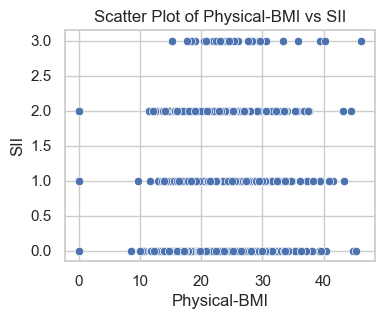

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# train_cleanedbmi is the cleaned DataFrame
plt.figure(figsize=(4, 3))
sns.scatterplot(x='Physical-BMI', y='sii', data=train_cleanedbmi)
plt.title('Scatter Plot of Physical-BMI vs SII')
plt.xlabel('Physical-BMI')
plt.ylabel('SII')
plt.show()


In [97]:
correlation_pearson = train_cleanedbmi['Physical-BMI'].corr(train_cleanedbmi['sii'], method='pearson')
print("Pearson Correlation - SII vs Physical-BMI :", correlation_pearson)
correlation_spearman = train_cleanedbmi['Physical-BMI'].corr(train_cleanedbmi['sii'], method='spearman')
print("Spearman Correlation - SII vs Physical-BMI :", correlation_spearman)


Pearson Correlation - SII vs Physical-BMI : 0.2170816645196008
Spearman Correlation - SII vs Physical-BMI : 0.23189430171174094


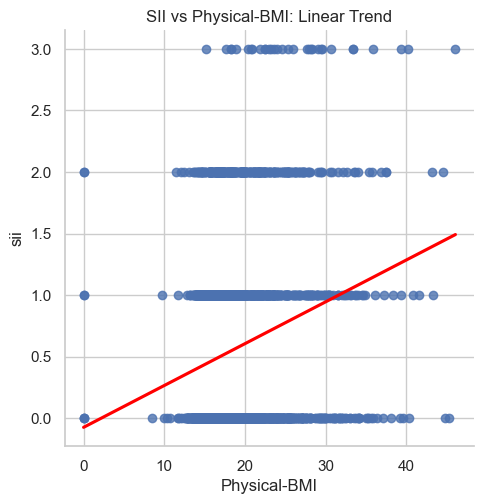

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Scatterplot with linear regression line
sns.lmplot(x='Physical-BMI', y='sii', data=train_cleanedbmi, line_kws={'color': 'red'}, ci=None)
plt.title('SII vs Physical-BMI: Linear Trend')
plt.show()


In [99]:
import pandas as pd

# Assuming 'train_cleanedbmi' is your DataFrame with 'Physical-BMI' and 'SII' columns
train_cleanedbmi['BMI_Quartile'] = pd.qcut(train_cleanedbmi['Physical-BMI'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# View the first few rows to check the categorization
print(train_cleanedbmi[['Physical-BMI', 'BMI_Quartile']].head())


   Physical-BMI BMI_Quartile
0     16.877316           Q2
1     14.035590           Q1
2     16.648696           Q2
3     18.292347           Q3
5     22.279952           Q4


C:\Users\samhi\AppData\Local\Temp\ipykernel_21596\3809692940.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleanedbmi['BMI_Quartile'] = pd.qcut(train_cleanedbmi['Physical-BMI'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])


ANOVA Physical-BMI vs sii

In [100]:
from scipy.stats import f_oneway

# Group data by BMI quartiles
group1 = train_cleanedbmi[train_cleanedbmi['BMI_Quartile'] == 'Q1']['sii']
group2 = train_cleanedbmi[train_cleanedbmi['BMI_Quartile'] == 'Q2']['sii']
group3 = train_cleanedbmi[train_cleanedbmi['BMI_Quartile'] == 'Q3']['sii']
group4 = train_cleanedbmi[train_cleanedbmi['BMI_Quartile'] == 'Q4']['sii']

# Perform ANOVA test
f_stat, p_val = f_oneway(group1, group2, group3, group4)
print(f"ANOVA: F-statistic = {f_stat}, p-value = {p_val}")



ANOVA: F-statistic = 51.51141128871578, p-value = 2.75746529616869e-32


t-test Physical-BMI vs sii

In [101]:
from scipy.stats import ttest_ind

# Perform T-test between two specific BMI quartiles, e.g., Q1 and Q4
t_stat, p_val_ttest = ttest_ind(group1, group4)
print(f"T-test (Q1 vs Q4): t-statistic = {t_stat}, p-value = {p_val_ttest}")


T-test (Q1 vs Q4): t-statistic = -11.762505193943172, p-value = 2.3883565709390344e-30


Individuals in the highest BMI quartile (Q4) have a significantly higher SII (Severity Impairment Index) compared to those in the lowest BMI quartile (Q1), indicating that BMI may be related to the severity of problematic internet use or other behaviors captured by the SII.

**Physical-Height vs sii & PCIAT-Total

In [102]:
# Check for the rows with null values in Physical-Height
null_values_phyh= train_cleaned2['Physical-Height'].isnull().sum()
print("Null values in Physical_Height before dropping: ", null_values_phyh)

# Drop rows with null values in the 'Physical-Height' column
train_cleanedh = train_cleaned2.dropna(subset=['Physical-Height'])

# Check for null values again after dropping the rows
null_values_phyh_after = train_cleanedh['Physical-Height'].isnull().sum()
print("Null values in null_values_phyh after dropping: ", null_values_phyh_after)

Null values in Physical_Height before dropping:  62
Null values in null_values_phyh after dropping:  0


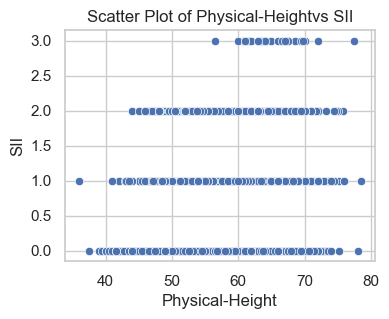

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# train_cleanedbmi is the cleaned DataFrame
plt.figure(figsize=(4, 3))
sns.scatterplot(x='Physical-Height', y='sii', data=train_cleanedbmi)
plt.title('Scatter Plot of Physical-Heightvs SII')
plt.xlabel('Physical-Height')
plt.ylabel('SII')
plt.show()

In [104]:
correlation_pearson = train_cleanedbmi['Physical-Height'].corr(train_cleanedbmi['sii'], method='pearson')
print("Pearson Correlation - SII vs Physical-Height :", correlation_pearson)
correlation_spearman = train_cleanedbmi['Physical-Height'].corr(train_cleanedbmi['sii'], method='spearman')
print("Spearman Correlation - SII vs Physical-Height :", correlation_spearman)


Pearson Correlation - SII vs Physical-Height : 0.3728766265259872
Spearman Correlation - SII vs Physical-Height : 0.3762191854553724


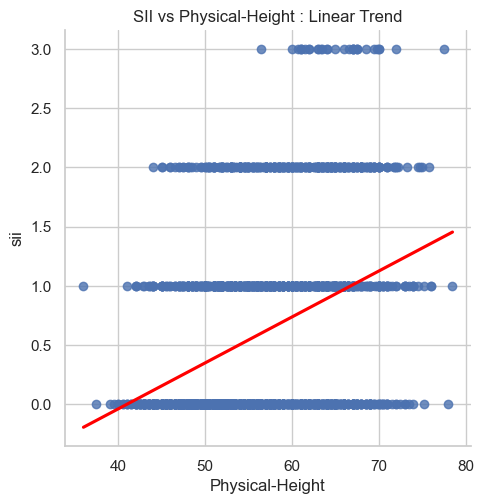

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Scatterplot with linear regression line
sns.lmplot(x='Physical-Height', y='sii', data=train_cleanedbmi, line_kws={'color': 'red'}, ci=None)
plt.title('SII vs Physical-Height : Linear Trend')
plt.show()


In [106]:
import pandas as pd

# train_phyh is your DataFrame with 'Physical-Height' and 'SII' columns
train_cleanedbmi['Height_Quartile'] = pd.qcut(train_cleanedbmi['Physical-Height'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# View the first few rows to check the categorization
print(train_cleanedbmi[['Physical-Height', 'Height_Quartile']].head())


   Physical-Height Height_Quartile
0             46.0              Q1
1             48.0              Q1
2             56.5              Q3
3             56.0              Q3
5             59.5              Q3


C:\Users\samhi\AppData\Local\Temp\ipykernel_21596\2950167834.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleanedbmi['Height_Quartile'] = pd.qcut(train_cleanedbmi['Physical-Height'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])


ANOVA Physical-Height Vs SII

In [107]:
from scipy.stats import f_oneway

# Group data by BMI quartiles
group1 = train_cleanedbmi[train_cleanedbmi['Height_Quartile'] == 'Q1']['sii']
group2 = train_cleanedbmi[train_cleanedbmi['Height_Quartile'] == 'Q2']['sii']
group3 = train_cleanedbmi[train_cleanedbmi['Height_Quartile'] == 'Q3']['sii']
group4 = train_cleanedbmi[train_cleanedbmi['Height_Quartile'] == 'Q4']['sii']

# Perform ANOVA test
f_stat, p_val = f_oneway(group1, group2, group3, group4)
print(f"ANOVA: F-statistic = {f_stat}, p-value = {p_val}")


ANOVA: F-statistic = 123.93994097776994, p-value = 9.188122605078412e-75


t-test Physical-Height Vs SII

In [108]:
from scipy.stats import ttest_ind

# Perform T-test between two specific BMI quartiles, e.g., Q1 and Q4
t_stat, p_val_ttest = ttest_ind(group1, group4)
print(f"T-test (Q1 vs Q4): t-statistic = {t_stat}, p-value = {p_val_ttest}")

T-test (Q1 vs Q4): t-statistic = -18.387511393486314, p-value = 5.999510674515433e-67


The Height has significance impact on the SII and has to be retained.

In [109]:
# Check for the rows with null values in Physical-Weight
null_values_phyw= train_cleaned2['Physical-Weight'].isnull().sum()
print("Null values in Physical-Weight before dropping: ", null_values_phyw)

# Drop rows with null values in the 'Physical-Weight' column
train_cleanedw = train_cleaned2.dropna(subset=['Physical-Weight'])

# Check for null values again after dropping the rows
null_values_phyw_after = train_cleanedw['Physical-Weight'].isnull().sum()
print("Null values in null_values_phyw after dropping: ", null_values_phyw_after)

Null values in Physical-Weight before dropping:  21
Null values in null_values_phyw after dropping:  0


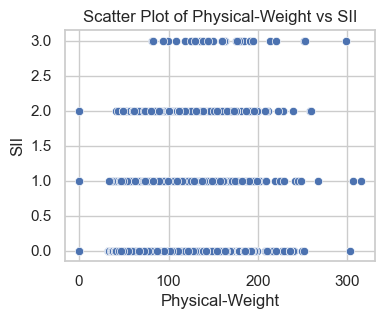

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# train_cleanedbmi is the cleaned DataFrame
plt.figure(figsize=(4, 3))
sns.scatterplot(x='Physical-Weight', y='sii', data=train_cleanedbmi)
plt.title('Scatter Plot of Physical-Weight vs SII')
plt.xlabel('Physical-Weight')
plt.ylabel('SII')
plt.show()


In [111]:
correlation_pearson = train_cleanedbmi['Physical-Weight'].corr(train_cleanedbmi['sii'], method='pearson')
print("Pearson Correlation - SII vs Physical-Weight :", correlation_pearson)
correlation_spearman = train_cleanedbmi['Physical-Weight'].corr(train_cleanedbmi['sii'], method='spearman')
print("Spearman Correlation - SII vs Physical-Weight :", correlation_spearman)


Pearson Correlation - SII vs Physical-Weight : 0.329346605435904
Spearman Correlation - SII vs Physical-Weight : 0.3508597709082928


The values suggest a moderately positive relationship. 

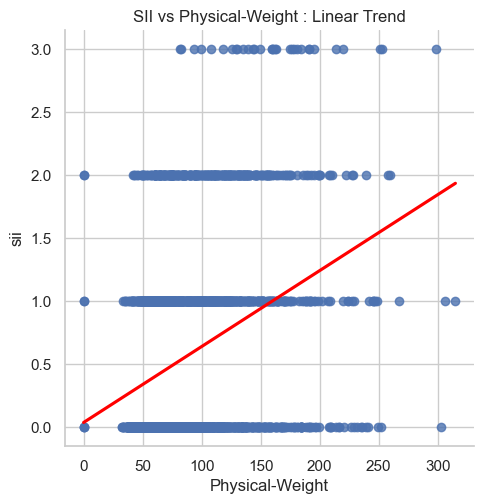

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Scatterplot with linear regression line
sns.lmplot(x='Physical-Weight', y='sii', data=train_cleanedbmi, line_kws={'color': 'red'}, ci=None)
plt.title('SII vs Physical-Weight : Linear Trend')
plt.show()


Quartile Distribution for weight

In [113]:
import pandas as pd

# train_phyh is your DataFrame with 'Physical-Height' and 'SII' columns
train_cleanedbmi['Weight_Quartile'] = pd.qcut(train_cleanedbmi['Physical-Weight'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# View the first few rows to check the categorization
print(train_cleanedbmi[['Physical-Weight', 'Weight_Quartile']].head())

   Physical-Weight Weight_Quartile
0             50.8              Q1
1             46.0              Q1
2             75.6              Q2
3             81.6              Q3
5            112.2              Q4


C:\Users\samhi\AppData\Local\Temp\ipykernel_21596\2995750374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleanedbmi['Weight_Quartile'] = pd.qcut(train_cleanedbmi['Physical-Weight'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])


ANOVA for Physical-Weight vs SII

In [114]:
from scipy.stats import f_oneway

# Group data by BMI quartiles
group1 = train_cleanedbmi[train_cleanedbmi['Weight_Quartile'] == 'Q1']['sii']
group2 = train_cleanedbmi[train_cleanedbmi['Weight_Quartile'] == 'Q2']['sii']
group3 = train_cleanedbmi[train_cleanedbmi['Weight_Quartile'] == 'Q3']['sii']
group4 = train_cleanedbmi[train_cleanedbmi['Weight_Quartile'] == 'Q4']['sii']

# Perform ANOVA test
f_stat, p_val = f_oneway(group1, group2, group3, group4)
print(f"ANOVA: F-statistic = {f_stat}, p-value = {p_val}")


ANOVA: F-statistic = 109.60210328070524, p-value = 1.309082851967369e-66


There is significant difference between groups

t-test for Physical-Weight vs SII

In [115]:
from scipy.stats import ttest_ind

# Perform T-test between two specific BMI quartiles, e.g., Q1 and Q4
t_stat, p_val_ttest = ttest_ind(group1, group4)
print(f"T-test (Q1 vs Q4): t-statistic = {t_stat}, p-value = {p_val_ttest}")

T-test (Q1 vs Q4): t-statistic = -17.578221207859773, p-value = 6.229202291111941e-62


It indicates that the difference between the means of Q1 and Q4  is statistically significant. This could suggest that there is a meaningful difference between Q1 and Q4.

There us significant relationship between SII and Physical-Weight, The column will be retained.

**Physical-Waist_Circumference Vs SII

In [116]:
# Check for the rows with null values in Physical-Waist_Circumference
null_values_phywc= train_cleaned2['Physical-Waist_Circumference'].isnull().sum()
print("Null values in Physical-Waist_Circumference before dropping: ", null_values_phywc)

# Drop rows with null values in the 'Physical-Waist_Circumference' column
train_cleanedwc = train_cleaned2.dropna(subset=['Physical-Waist_Circumference'])

# Check for null values again after dropping the rows
null_values_phywc_after = train_cleanedwc['Physical-Waist_Circumference'].isnull().sum()
print("Null values in null_values_phywc after dropping: ", null_values_phywc_after)


Null values in Physical-Waist_Circumference before dropping:  2056
Null values in null_values_phywc after dropping:  0


In [117]:
# Assuming your DataFrame after dropping rows is named 'train_cleanedw'
number_of_rows = train_cleanedwc.shape[0]
print("Number of rows after dropping null values:", number_of_rows)

Number of rows after dropping null values: 475


The data is very less to establish a relationship and hence will be removed. 

In [118]:
# Drop the 'Physical-Waist_Circumference' column and update the DataFrame
train_cleaned = train_cleaned.drop(columns=['Physical-Waist_Circumference'])

In [119]:
print(train_cleaned.columns)

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total

**Physical-Diastolic_BP vs SII

In [120]:
# Check for the rows with null values in Physical-Diastolic_BP
null_values_phyDBP= train_cleaned2['Physical-Diastolic_BP'].isnull().sum()
print("Null values in Physical-Diastolic_BP before dropping: ", null_values_phywc)

# Drop rows with null values in the 'Physical-Diastolic_BP' column
train_cleaneddbp = train_cleaned2.dropna(subset=['Physical-Diastolic_BP'])

# Check for null values again after dropping the rows
null_values_phydbp_after = train_cleaneddbp['Physical-Diastolic_BP'].isnull().sum()
print("Null values in null_values_phydbp after dropping: ", null_values_phydbp_after)


Null values in Physical-Diastolic_BP before dropping:  2056
Null values in null_values_phydbp after dropping:  0


Dropping the column Physical-Diastolic_BP

In [121]:
# Check for the rows with null values in Physical-HeartRate
null_values_phyHR= train_cleaned2['Physical-HeartRate'].isnull().sum()
print("Null values in Physical-HeartRate before dropping: ", null_values_phywc)

# Drop rows with null values in the 'Physical-Diastolic_BP' column
train_cleanedHR = train_cleaned2.dropna(subset=['Physical-HeartRate'])

# Check for null values again after dropping the rows
null_values_phyHR_after = train_cleanedHR['Physical-HeartRate'].isnull().sum()
print("Null values in null_values_phyHR after dropping: ", null_values_phyHR_after)


Null values in Physical-HeartRate before dropping:  2056
Null values in null_values_phyHR after dropping:  0


Dropping the column Physical-HeartRate

In [122]:
# Check for the rows with null values in Physical-Systolic_BP
null_values_phySBP= train_cleaned2['Physical-Systolic_BP'].isnull().sum()
print("Null values in Physical-Diastolic_BP before dropping: ", null_values_phywc)

# Drop rows with null values in the 'Physical-Systolic_BP' column
train_cleanedsbp = train_cleaned2.dropna(subset=['Physical-Systolic_BP'])

# Check for null values again after dropping the rows
null_values_physbp_after = train_cleanedsbp['Physical-Systolic_BP'].isnull().sum()
print("Null values in null_values_phydbp after dropping: ", null_values_physbp_after)


Null values in Physical-Diastolic_BP before dropping:  2056
Null values in null_values_phydbp after dropping:  0


Dropping the column Physical-Systolic_BP

In [123]:
# Drop the 'CGAS-Season' column and update the DataFrame
train_cleaned = train_cleaned.drop(columns=['Physical-Diastolic_BP','Physical-HeartRate','Physical-Systolic_BP'])

In [124]:
print(train_cleaned.columns)

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total', 'PAQ_C-Season',
       'PAQ_C-PAQ_C_Total', 'PCIAT-Season', 'PCIAT-PCIAT_01

### Fitness Gram Data

In [125]:
#Checking for empty columns in the Fitness Gram Data
additional_columns_to_check = [
    'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage', 
    'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
    'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 
    'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD',
    'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone',
    'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 
    'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone'
]

# Loop through each additional column and print the number of null values
for column in additional_columns_to_check:
    null_count = train_cleaned[column].isnull().sum()
    print(f'Null values in {column}: {null_count}')


Null values in Fitness_Endurance-Season: 1440
Null values in Fitness_Endurance-Max_Stage: 1956
Null values in Fitness_Endurance-Time_Mins: 1959
Null values in Fitness_Endurance-Time_Sec: 1959
Null values in FGC-Season: 86
Null values in FGC-FGC_CU: 795
Null values in FGC-FGC_CU_Zone: 830
Null values in FGC-FGC_GSND: 1828
Null values in FGC-FGC_GSND_Zone: 1835
Null values in FGC-FGC_GSD: 1828
Null values in FGC-FGC_GSD_Zone: 1834
Null values in FGC-FGC_PU: 804
Null values in FGC-FGC_PU_Zone: 838
Null values in FGC-FGC_SRL: 803
Null values in FGC-FGC_SRL_Zone: 837
Null values in FGC-FGC_SRR: 801
Null values in FGC-FGC_SRR_Zone: 835
Null values in FGC-FGC_TL: 795
Null values in FGC-FGC_TL_Zone: 829


In [126]:
# Drop the 'FGC-Season' column and update the DataFrame
train_cleaned = train_cleaned.drop(columns=['FGC-Season'])

In [127]:
print(train_cleaned.columns)

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone',
       'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone',
       'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone',
       'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total', 'PAQ_C-Season',
       'PAQ_C-PAQ_C_Total', 'PCIAT-Season', 'PCIAT-PCIAT_01', 'PCIAT-PCIA

In [128]:
# Drop the 'Fitness_Endurance-Season' column and update the DataFrame
train_cleaned = train_cleaned.drop(columns=['Fitness_Endurance-Season'])

In [129]:
print(train_cleaned.columns)

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight',
       'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins',
       'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone',
       'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone',
       'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone',
       'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone',
       'BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC',
       'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW',
       'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat',
       'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST',
       'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total',
       'PAQ_C-Season', 'PAQ_C-PAQ_C_Total', 'PCIAT-Season', 'PCIAT-PCIAT_01',
       'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PC

**Dropping all the FitnessGram Related Columns(with float values)** 
Retaining both type of values wouldn’t make sense as it would only increase the dimensionality of the data. Therefore, we are only retaining the zones of the data as they are standard practices in psychological assessments and directly indicate the severity levels and additionally, they also do have less missing values. 

In [130]:
train_cleaned= train_cleaned.drop(columns=['FGC-FGC_CU','FGC-FGC_GSND','FGC-FGC_GSD','FGC-FGC_PU','FGC-FGC_SRL','FGC-FGC_SRR','FGC-FGC_TL'])

In [131]:
print(train_cleaned.columns)

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight',
       'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins',
       'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND_Zone',
       'FGC-FGC_GSD_Zone', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL_Zone',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total', 'PAQ_C-Season',
       'PAQ_C-PAQ_C_Total', 'PCIAT-Season', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02',
       'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
       'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09'

**FGC_CU_Zone vs sii**

In [132]:
train_cleanedfcu=train_cleaned.dropna(subset=["FGC-FGC_CU_Zone"])

# Check if the rows with null values have been removed
null_values_fcu = train_cleanedfcu['FGC-FGC_CU_Zone'].isnull().sum()
print("Null values in 'CU Zone' column after dropping:", null_values_fcu)

Null values in 'CU Zone' column after dropping: 0


In [133]:
from scipy.stats import pearsonr, spearmanr

# Compute Pearson and Spearman correlation
pearson_corr, pearson_p = pearsonr(train_cleanedfcu["FGC-FGC_CU_Zone"], train_cleanedfcu["sii"])
spearman_corr, spearman_p = spearmanr(train_cleanedfcu["FGC-FGC_CU_Zone"], train_cleanedfcu["sii"])

print(f"Pearson Correlation: {pearson_corr}, P-value: {pearson_p}")
print(f"Spearman Correlation: {spearman_corr}, P-value: {spearman_p}")


Pearson Correlation: -0.018652361103432734, P-value: 0.42380318265698197
Spearman Correlation: -0.011009587062453948, P-value: 0.6368693652690971


In [134]:
from sklearn.feature_selection import mutual_info_regression

# Reshape to 2D array for MI calculation
X = train_cleanedfcu["FGC-FGC_CU_Zone"].values.reshape(-1, 1)
y = train_cleanedfcu["sii"]

# Compute mutual information
mi = mutual_info_regression(X, y)
print(f"Mutual Information: {mi[0]}")


Mutual Information: 0


In [135]:
from scipy.stats import f_oneway, kruskal

# Group SII by Zone
grouped = [train_cleanedfcu[train_cleanedfcu["FGC-FGC_CU_Zone"] == zone]["sii"].dropna() for zone in train_cleanedfcu["FGC-FGC_CU_Zone"].unique()]

# ANOVA
anova_stat, anova_p = f_oneway(*grouped)
print(f"ANOVA Statistic: {anova_stat}, P-value: {anova_p}")

# Kruskal-Wallis (non-parametric alternative)
kruskal_stat, kruskal_p = kruskal(*grouped)
print(f"Kruskal-Wallis Statistic: {kruskal_stat}, P-value: {kruskal_p}")


ANOVA Statistic: 0.640030220215472, P-value: 0.4238031826570875
Kruskal-Wallis Statistic: 0.22302825340537524, P-value: 0.6367421653957994


In [136]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
# This is an example; you should modify this to suit your data
# For example, you may want to discretize 'sii' values if they're continuous
contingency_table = pd.crosstab(train_cleanedfcu["FGC-FGC_CU_Zone"], train_cleanedfcu["sii"])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)


Chi-Square Statistic: 4.026128457404486
P-value: 0.2586565157909253
Degrees of Freedom: 3
Expected Frequencies:
[[528.25746877 221.45084193 112.38511678  10.90657251]
 [585.74253123 245.54915807 124.61488322  12.09342749]]


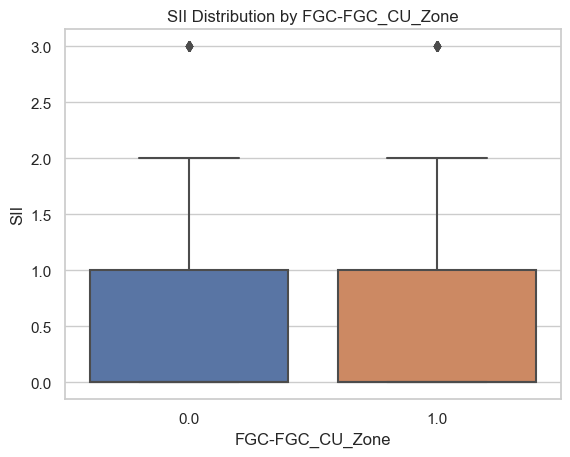

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="FGC-FGC_CU_Zone", y="sii", data=train_cleanedfcu)
plt.title("SII Distribution by FGC-FGC_CU_Zone")
plt.xlabel("FGC-FGC_CU_Zone")
plt.ylabel("SII")
plt.show()


### Bio-electric Impedance Analysis

In [138]:
#Checking for the empty values in each column

BIA_columns_to_check = [
    'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR',
    'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI',
    'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW',
    'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW'
]

# Loop through each column and print the number of null values
for column in columns_to_check:
    null_count = train_cleaned[column].isnull().sum()
    print(f'Null values in {column}: {null_count}')


Null values in PCIAT-PCIAT_01: 0
Null values in PCIAT-PCIAT_02: 0
Null values in PCIAT-PCIAT_03: 0
Null values in PCIAT-PCIAT_04: 0
Null values in PCIAT-PCIAT_05: 0
Null values in PCIAT-PCIAT_06: 0
Null values in PCIAT-PCIAT_07: 0
Null values in PCIAT-PCIAT_08: 0
Null values in PCIAT-PCIAT_09: 0
Null values in PCIAT-PCIAT_10: 0
Null values in PCIAT-PCIAT_11: 0
Null values in PCIAT-PCIAT_12: 0
Null values in PCIAT-PCIAT_13: 0
Null values in PCIAT-PCIAT_14: 0
Null values in PCIAT-PCIAT_15: 0
Null values in PCIAT-PCIAT_16: 0
Null values in PCIAT-PCIAT_17: 0
Null values in PCIAT-PCIAT_18: 0
Null values in PCIAT-PCIAT_19: 0
Null values in PCIAT-PCIAT_20: 0


In [139]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# List of specific columns to include in Composite Index calculation
selected_columns = [
    "BIA-BIA_BMC", "BIA-BIA_BMI", "BIA-BIA_BMR", "BIA-BIA_DEE", "BIA-BIA_ECW",
    "BIA-BIA_FFM", "BIA-BIA_FFMI", "BIA-BIA_FMI", "BIA-BIA_Fat", "BIA-BIA_ICW",
    "BIA-BIA_LDM", "BIA-BIA_LST", "BIA-BIA_SMM", "BIA-BIA_TBW"
]

# Normalize the selected columns using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(train_cleaned[selected_columns])
normalized_train_cleaned = pd.DataFrame(normalized_data, columns=selected_columns)

# Compute the correlation matrix for selected columns including the SII column
correlation_matrix = train_cleaned[selected_columns + ["sii"]].corr()

# Extract correlations with the SII column
target_feature = "sii"  # Target feature for correlation
correlations = correlation_matrix[target_feature].abs()

# Exclude the target itself from the weights
correlations = correlations.drop(target_feature)

# Normalize weights to sum to 1
weights = correlations / correlations.sum()

# Compute the Composite Index for the selected columns
composite_index = normalized_train_cleaned.mul(weights, axis=1).sum(axis=1)

# Create a new DataFrame to store the results
result_df = normalized_train_cleaned.copy()

# Add the Composite Index to the new DataFrame
result_df["Composite_Index"] = composite_index

# Add the SII column from the original DataFrame to the result DataFrame
result_df["sii"] = train_cleaned["sii"].reset_index(drop=True)

# Print the resulting DataFrame
print(result_df.head())

# Compute the correlation between Composite Index and SII
composite_sii_correlation = result_df[["Composite_Index", "sii"]].corr()

# Print the correlation matrix
print("Correlation between Composite Index and SII:")
print(composite_sii_correlation)


   BIA-BIA_BMC  BIA-BIA_BMI  BIA-BIA_BMR  BIA-BIA_DEE  BIA-BIA_ECW  \
0     0.002536     0.348271     0.001446     0.003385     0.002001   
1     0.002515     0.289461     0.001497     0.003439     0.001309   
2          NaN          NaN          NaN          NaN          NaN   
3     0.002821     0.377553     0.003862     0.006874     0.004272   
4     0.002939     0.623630     0.006286     0.007464     0.008796   

   BIA-BIA_FFM  BIA-BIA_FFMI  BIA-BIA_FMI  BIA-BIA_Fat  BIA-BIA_ICW  \
0     0.001446      0.028360     0.886743     0.986476     0.002701   
1     0.001497      0.023632     0.878426     0.985886     0.001307   
2          NaN           NaN          NaN          NaN          NaN   
3     0.003863      0.029581     0.891953     0.987559     0.005147   
4     0.006286      0.042032     0.933670     0.993098     0.006176   

   BIA-BIA_LDM  BIA-BIA_LST  BIA-BIA_SMM  BIA-BIA_TBW  Composite_Index  sii  
0     0.001372     0.003283     0.002269     0.002134         0.230392  2.

In [140]:
print(result_df.columns)

Index(['BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE',
       'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI',
       'BIA-BIA_Fat', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST',
       'BIA-BIA_SMM', 'BIA-BIA_TBW', 'Composite_Index', 'sii'],
      dtype='object')


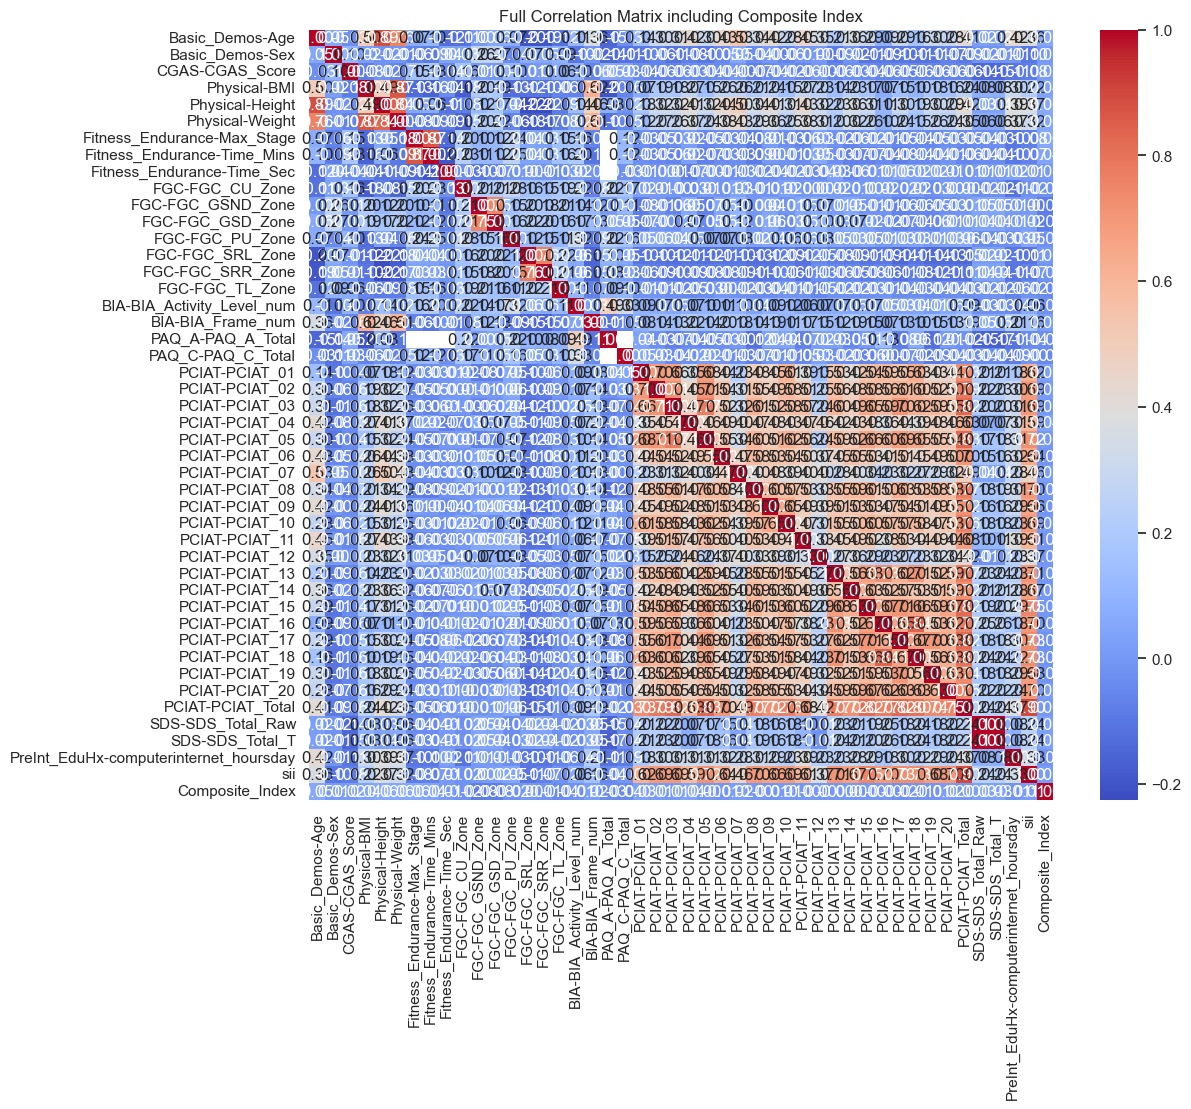

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# List of specific columns to include in Composite Index calculation
selected_columns = [
    "BIA-BIA_BMC", "BIA-BIA_BMI", "BIA-BIA_BMR", "BIA-BIA_DEE", "BIA-BIA_ECW",
    "BIA-BIA_FFM", "BIA-BIA_FFMI", "BIA-BIA_FMI", "BIA-BIA_Fat", "BIA-BIA_ICW",
    "BIA-BIA_LDM", "BIA-BIA_LST", "BIA-BIA_SMM", "BIA-BIA_TBW"]

# Normalize the selected columns using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(train_cleaned[selected_columns])
normalized_train_cleaned = pd.DataFrame(normalized_data, columns=selected_columns)

# Compute the correlation matrix for selected columns including the SII column
correlation_matrix = train_cleaned[selected_columns + ["sii"]].corr()

# Extract correlations with the SII column
target_feature = "sii"  # Target feature for correlation
correlations = correlation_matrix[target_feature].abs()

# Exclude the target itself from the weights
correlations = correlations.drop(target_feature)

# Normalize weights to sum to 1
weights = correlations / correlations.sum()

# Compute the Composite Index for the selected columns
composite_index = normalized_train_cleaned.mul(weights, axis=1).sum(axis=1)

# Add the Composite Index to the train_cleaned DataFrame
train_cleaned["Composite_Index"] = composite_index

# Create a result DataFrame with all columns from train_cleaned
result_df = train_cleaned.copy()

# Drop the selected columns used for the Composite Index calculation
result_df = result_df.drop(columns=selected_columns)

# Compute the full correlation matrix including all remaining columns and the Composite Index
full_correlation_matrix = result_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(full_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Full Correlation Matrix including Composite Index")
plt.show()


In [142]:
Bnull = result_df['Composite_Index'].isnull().sum()
print('Null values in Composite Index', Bnull)

Null values in Composite Index 873


In [143]:
# Add the Composite Index back to the original DataFrame
result_df["Composite_Index"] = composite_index

# Compute the correlation between Composite Index and sii
composite_sii_correlation = result_df[["Composite_Index", "sii"]].corr()

# Print the correlation matrix
print("Correlation between Composite Index and sii:")
print(composite_sii_correlation)

Correlation between Composite Index and sii:
                 Composite_Index       sii
Composite_Index         1.000000  0.010557
sii                     0.010557  1.000000


In [144]:
# Add the Composite Index back to the original DataFrame
result_df["Composite_Index"] = composite_index

# Add the SII column to the result DataFrame
result_df["sii"] = train_cleaned["sii"].reset_index(drop=True)

# Compute the Pearson correlation between Composite Index and SII
pearson_corr = result_df[["Composite_Index", "sii"]].corr(method="pearson")

# Compute the Spearman correlation between Composite Index and SII
spearman_corr = result_df[["Composite_Index", "sii"]].corr(method="spearman")

# Print the correlations
print("Correlation between Composite Index and SII (Pearson):")
print(pearson_corr)

print("\nCorrelation between Composite Index and SII (Spearman):")
print(spearman_corr)


Correlation between Composite Index and SII (Pearson):
                 Composite_Index       sii
Composite_Index         1.000000  0.031829
sii                     0.031829  1.000000

Correlation between Composite Index and SII (Spearman):
                 Composite_Index       sii
Composite_Index         1.000000  0.095998
sii                     0.095998  1.000000


In [147]:
kendall_corr = result_df[["Composite_Index", "sii"]].corr(method="kendall")
print("Correlation between Composite Index and SII (Kendall):")
print(kendall_corr)

Correlation between Composite Index and SII (Kendall):
                 Composite_Index       sii
Composite_Index         1.000000  0.078228
sii                     0.078228  1.000000


In [120]:
from scipy.stats import pearsonr

# Assuming you have your data as arrays or lists
r_value, p_value = pearsonr(composite_index, sii)
print("Correlation coefficient:", r_value)
print("P-value:", p_value)
kendall_corr = result_df[["Composite_Index", "sii"]].corr(method="kendall")
print("Correlation between Composite Index and SII (Kendall):")
print(kendall_corr)


Correlation between Composite Index and SII (Kendall):
                 Composite_Index      sii
Composite_Index          1.00000  0.08186
sii                      0.08186  1.00000


In [122]:
pip install dcor

     ---------------------------------------- 55.5/55.5 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [123]:
import dcor

distance_corr = dcor.distance_correlation(result_df["Composite_Index"], result_df["sii"])
print(f"Distance Correlation between Composite Index and SII: {distance_corr}")


Distance Correlation between Composite Index and SII: 0.061849830741303624


In [124]:
from sklearn.metrics import mutual_info_score

mutual_info = mutual_info_score(result_df["Composite_Index"].round(3), result_df["sii"].round(3))
print(f"Mutual Information between Composite Index and SII: {mutual_info}")


Mutual Information between Composite Index and SII: 0.11060839939531064


C:\Users\samhi\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [126]:
from scipy.stats import pointbiserialr

binary_sii = (result_df["sii"] > result_df["sii"].median()).astype(int)
pb_correlation, p_value = pointbiserialr(binary_sii, result_df["Composite_Index"])
print(f"Point-Biserial Correlation: {pb_correlation}, p-value: {p_value}")


Point-Biserial Correlation: 0.023612218125896374, p-value: 0.2224956375341916


In [129]:
from sklearn.cross_decomposition import CCA
import numpy as np
from sklearn.utils import shuffle

# Prepare the data
X = result_df[["Composite_Index"]]
Y = result_df[["sii"]]

# Fit the Canonical Correlation Analysis model
cca = CCA(n_components=1)
cca.fit(X, Y)

# Calculate the canonical correlation
correlation = cca.score(X, Y)

# Perform permutation test to get p-value
n_permutations = 1000  # number of permutations
observed_correlation = correlation

# Store permuted correlations
permuted_correlations = []

# Perform the permutation test
for _ in range(n_permutations):
    Y_permuted = shuffle(Y)  # Shuffle Y to create a null hypothesis distribution
    cca.fit(X, Y_permuted)  # Re-fit the model with permuted Y
    permuted_correlation = cca.score(X, Y_permuted)
    permuted_correlations.append(permuted_correlation)

# Calculate p-value as the proportion of permuted correlations greater than the observed one
p_value = np.mean(np.array(permuted_correlations) >= observed_correlation)

# Output results
print(f"Canonical Correlation: {observed_correlation}")
print(f"P-value: {p_value}")


Canonical Correlation: -0.9305262123063314
P-value: 0.082


In [130]:
from statsmodels.tsa.stattools import grangercausalitytests

# Assuming 'result_df' is your DataFrame and 'Composite_Index' and 'sii' are the columns of interest
# Perform Granger Causality Test with a maximum lag of 4
granger_result = grangercausalitytests(result_df[['Composite_Index', 'sii']], maxlag=4)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2191  , p=0.2696  , df_denom=2667, df_num=1
ssr based chi2 test:   chi2=1.2205  , p=0.2693  , df=1
likelihood ratio test: chi2=1.2202  , p=0.2693  , df=1
parameter F test:         F=1.2191  , p=0.2696  , df_denom=2667, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5903  , p=0.5542  , df_denom=2664, df_num=2
ssr based chi2 test:   chi2=1.1828  , p=0.5536  , df=2
likelihood ratio test: chi2=1.1825  , p=0.5536  , df=2
parameter F test:         F=0.5903  , p=0.5542  , df_denom=2664, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3770  , p=0.7696  , df_denom=2661, df_num=3
ssr based chi2 test:   chi2=1.1339  , p=0.7689  , df=3
likelihood ratio test: chi2=1.1337  , p=0.7690  , df=3
parameter F test:         F=0.3770  , p=0.7696  , df_denom=2661, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3940  , p=0.

In [197]:
# Drop the 'BIA-Season' column and update the DataFrame
train_cleaned = train_cleaned.drop(columns=['BIA-Season'])

In [198]:
print(train_cleaned.columns)

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight',
       'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins',
       'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND_Zone',
       'FGC-FGC_GSD_Zone', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL_Zone',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num',
       'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE',
       'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI',
       'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM',
       'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_A-Season',
       'PAQ_A-PAQ_A_Total', 'PAQ_C-Season', 'PAQ_C-PAQ_C_Total',
       'PCIAT-Season', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03',
       'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07',
       'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT

In [72]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# List of specific columns to include in Composite Index calculation
selected_columns = [
    "BIA-BIA_BMC", "BIA-BIA_BMI", "BIA-BIA_BMR", "BIA-BIA_DEE", "BIA-BIA_ECW",
    "BIA-BIA_FFM", "BIA-BIA_FFMI", "BIA-BIA_FMI", "BIA-BIA_Fat", "BIA-BIA_ICW",
    "BIA-BIA_LDM", "BIA-BIA_LST", "BIA-BIA_SMM", "BIA-BIA_TBW"
]

# Normalize the selected columns using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(train_cleaned[selected_columns])
normalized_train_cleaned = pd.DataFrame(normalized_data, columns=selected_columns)

# Compute weights (use correlation or any other method you prefer)
correlation_matrix = train_cleaned[selected_columns + ["sii"]].corr()
target_feature = "sii"
correlations = correlation_matrix[target_feature].abs()
correlations = correlations.drop(target_feature)
weights = correlations / correlations.sum()

# Compute the Composite Index
composite_index = normalized_train_cleaned.mul(weights, axis=1).sum(axis=1)
train_cleaned["Composite_Physical_Fitness_Index"] = composite_index

# Calculate the full correlation matrix including all columns
full_correlation_matrix = train_cleaned.corr()

# Extract correlations of the Composite Index with all other columns
composite_index_correlations = full_correlation_matrix["Composite_Physical_Fitness_Index"]

# Print the correlations
print("Correlations with Composite Physical Fitness Index:")
print(composite_index_correlations)


Correlations with Composite Physical Fitness Index:
Basic_Demos-Age                           0.054679
Basic_Demos-Sex                           0.009350
CGAS-CGAS_Score                           0.019282
Physical-BMI                              0.036170
Physical-Height                           0.061317
                                            ...   
SDS-SDS_Total_T                           0.029027
PreInt_EduHx-computerinternet_hoursday   -0.012422
sii                                       0.010557
Composite_Index                           1.000000
Composite_Physical_Fitness_Index          1.000000
Name: Composite_Physical_Fitness_Index, Length: 61, dtype: float64


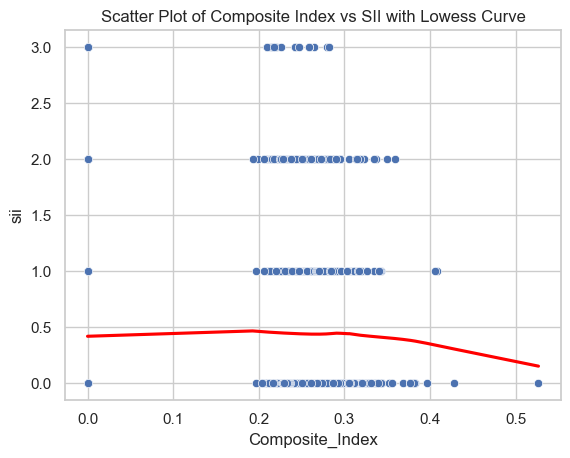

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter plot with a lowess curve
sns.scatterplot(x=train_cleaned["Composite_Index"], y=train_cleaned["sii"])
sns.regplot(x=train_cleaned["Composite_Index"], y=train_cleaned["sii"], lowess=True, scatter=False, color='red')
plt.title("Scatter Plot of Composite Index vs SII with Lowess Curve")
plt.show()


In [75]:
print("NaN values in x:", x.isna().sum())
print("NaN values in y:", y.isna().sum())


NaN values in x: 873
NaN values in y: 0
